In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [156]:
df=pd.read_csv("bank-full.csv")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [158]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
subscribed           2
dtype: int64

<Axes: >

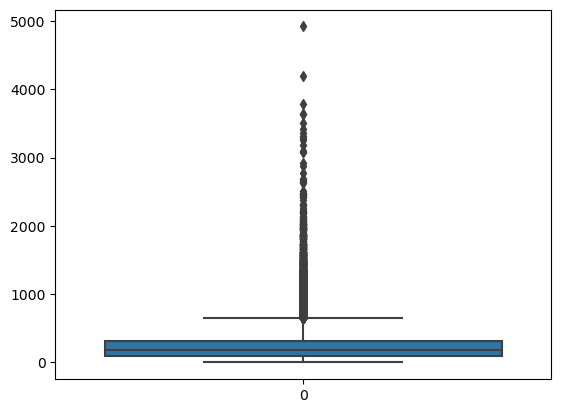

In [159]:
import seaborn as sns
sns.boxplot(df['duration'])

In [160]:
#вичисляем сначала первый квартель с 25 процентами и методом средней точки
#вычисляем третий кваретль с 75 процентами 
#далее расчитв\ываем межквартильный размах как разницу между этими квартелями
#вычисляем нижнюю границу выбросов и верхнюю
#удаляем строки с выбросами

q1 = np.percentile(df['duration'], 25, method='midpoint')
q3 = np.percentile(df['duration'], 75, method='midpoint')
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
upper_array = np.where(df['duration'] >= upper)[0]
lower_array = np.where(df['duration'] <= lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

<Axes: >

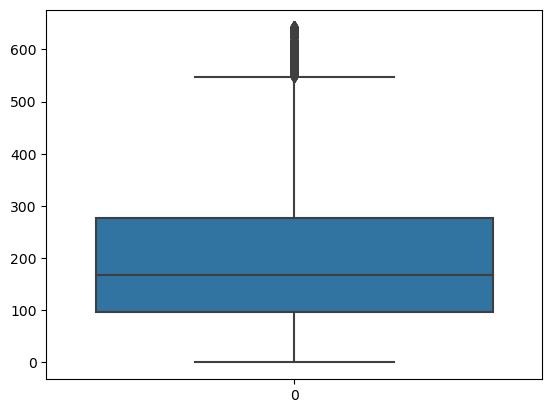

In [161]:
import seaborn as sns
sns.boxplot(df['duration'])

In [162]:
for df_nuw in df:
    le=LabelEncoder()
    df[df_nuw]=le.fit_transform(df[df_nuw])
    #преобоазовываем знанчения

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38225 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             38225 non-null  int64
 1   job             38225 non-null  int32
 2   marital         38225 non-null  int32
 3   education       38225 non-null  int32
 4   default         38225 non-null  int32
 5   housing         38225 non-null  int32
 6   loan            38225 non-null  int32
 7   contact         38225 non-null  int32
 8   month           38225 non-null  int32
 9   day_of_week     38225 non-null  int32
 10  duration        38225 non-null  int64
 11  campaign        38225 non-null  int64
 12  pdays           38225 non-null  int64
 13  previous        38225 non-null  int64
 14  poutcome        38225 non-null  int32
 15  emp.var.rate    38225 non-null  int64
 16  cons.price.idx  38225 non-null  int64
 17  cons.conf.idx   38225 non-null  int64
 18  euribor3m       38225 non-

In [112]:
df.isnull().sum()
#количество пропущенных значени2й в столбце

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [113]:
df.shape

(38225, 21)

In [114]:
df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          645
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         315
nr.employed        11
subscribed          2
dtype: int64

In [115]:
df.corr()
#матрица корреляций мжду столбцами
#показываем насколько два разных столбца связаны медду собой
#1 - положительная линейная корреляция
#-1 - отрицательная линейная корреляуиц я
#0 - отсутствие корреляции отбор значимых переменных

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
age,1.000000,0.001406,-0.389987,-0.119432,0.165523,-0.003550,-0.007872,0.006222,-0.026753,-0.017854,...,0.004780,-0.037920,0.023139,0.021491,0.005816,-0.004160,0.126191,-0.044366,-0.021652,0.043419
job,0.001406,1.000000,0.026629,0.134616,-0.030566,0.007311,-0.013364,-0.024653,-0.033722,0.000139,...,-0.006587,-0.027042,0.020136,0.011256,-0.003410,-0.015363,0.055482,-0.024543,-0.022221,0.030841
marital,-0.389987,0.026629,1.000000,0.109690,-0.080918,0.012466,0.005631,-0.056088,-0.007653,0.001600,...,-0.007670,-0.035516,0.038338,0.001545,-0.082761,-0.057921,-0.028340,-0.079168,-0.080261,0.050604
education,-0.119432,0.134616,0.109690,1.000000,-0.187475,0.014651,0.006289,-0.106276,-0.085809,-0.018280,...,-0.000347,-0.043806,0.035184,0.016738,-0.026916,-0.081970,0.084603,-0.055153,-0.034502,0.067617
default,0.165523,-0.030566,-0.080918,-0.187475,1.000000,-0.012458,-0.000239,0.134420,-0.018002,-0.006551,...,0.033398,0.078165,-0.102419,0.024707,0.190663,0.167406,0.020411,0.194119,0.176185,-0.112904
housing,-0.003550,0.007311,0.012466,0.014651,-0.012458,1.000000,0.043590,-0.081755,-0.017921,0.004762,...,-0.011063,-0.008935,0.018852,-0.012896,-0.054709,-0.076386,-0.030659,-0.040394,-0.035423,0.014830
loan,-0.007872,-0.013364,0.005631,0.006289,-0.000239,0.043590,1.000000,-0.008186,-0.004638,-0.010609,...,0.004233,-0.000420,-0.000226,-0.003329,0.001459,0.000037,-0.013175,0.004792,0.004440,-0.009327
contact,0.006222,-0.024653,-0.056088,-0.106276,0.134420,-0.081755,-0.008186,1.000000,0.277458,-0.010250,...,0.077756,0.117180,-0.215074,0.121638,0.351636,0.587911,0.237341,0.275258,0.176167,-0.151642
month,-0.026753,-0.033722,-0.007653,-0.085809,-0.018002,-0.017921,-0.004638,0.277458,1.000000,0.027516,...,-0.061288,-0.045440,0.104064,-0.068831,-0.190176,-0.005603,-0.026259,-0.197458,-0.267351,-0.000168
day_of_week,-0.017854,0.000139,0.001600,-0.018280,-0.006551,0.004762,-0.010609,-0.010250,0.027516,1.000000,...,-0.036773,-0.010693,-0.003336,0.018381,0.034386,0.000116,0.033599,0.023433,0.023428,0.014321


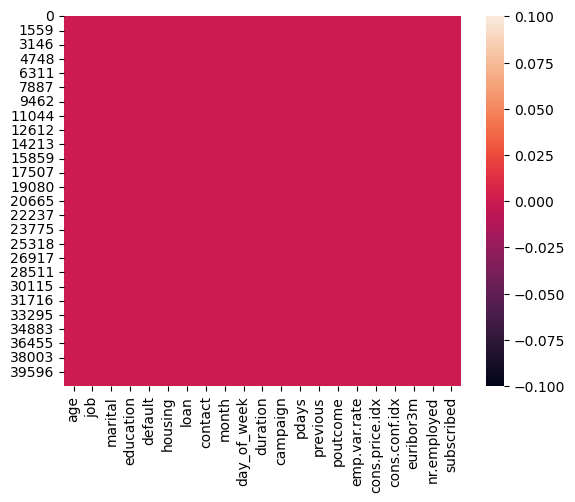

In [116]:
#график показывает распределение пропущенных значений 
sns.heatmap(df.isnull())
plt.show()

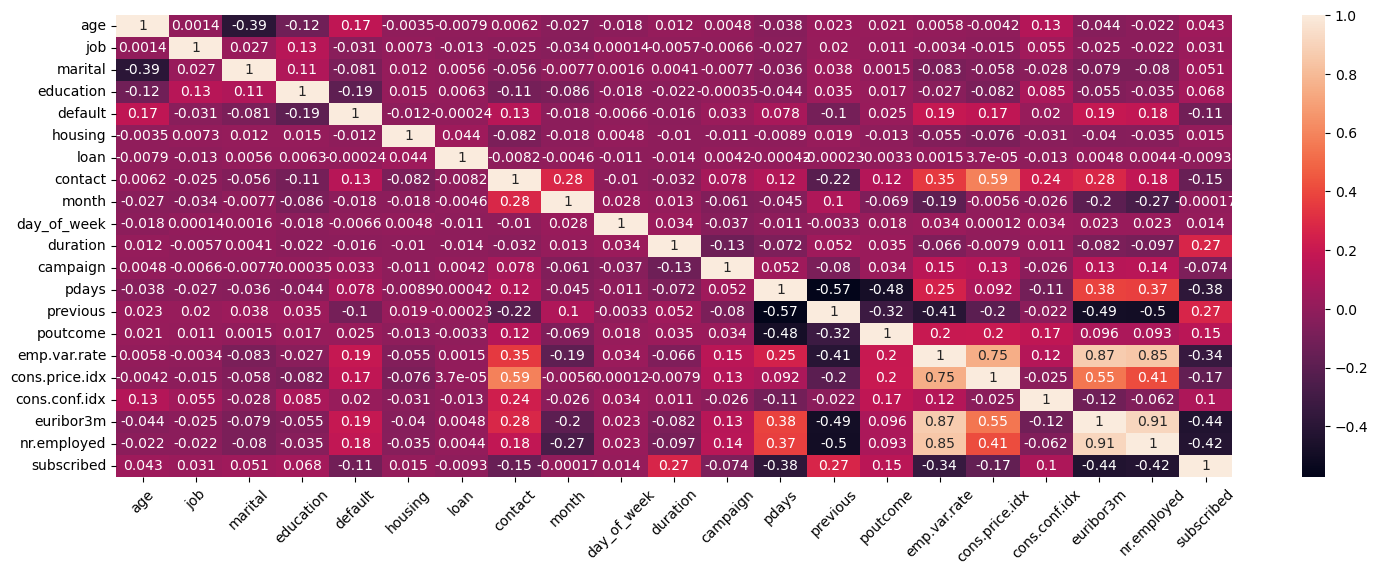

In [117]:
# making the heatmap of that 
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45);
#матрица бедет показывать коэффициент корреляции между парами
#светлые цвета показывают сильную  положительную корреляцию
#темные сильную отрицательную корреляцию
#промежуточный цвет - отсутвие либо слабая корреляция

кластеризация

In [119]:
df = pd.get_dummies(df)
df.head()

#преобразование категориальных переменных в числовой формат с помощью метода для того чтобы дальше мы могли обучать модель


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,286,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,286,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,286,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,286,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,286,8,0


In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df
#создание объекта класса
#метод fit_transform объекта scaler используется для стандартизации данных df
#он сначала вычисляет среднее и стандартное отклонение данных таблицы с помощью метода fit
#затем использует эти параметры для масштабирования данных с помощью метода transform

array([[ 1.5303475 , -0.2014654 , -0.28107389, ...,  0.45665123,
         0.06180062, -0.29780892],
       [ 1.62628866,  0.91011296, -0.28107389, ...,  0.45665123,
         0.06180062, -0.29780892],
       [-0.29253458,  0.91011296, -0.28107389, ...,  0.45665123,
         0.06180062, -0.29780892],
       ...,
       [ 1.5303475 ,  0.35432378, -0.28107389, ..., -1.24015585,
        -3.20672768, -0.29780892],
       [ 0.37905355,  1.46590213, -0.28107389, ..., -1.24015585,
        -3.20672768,  3.35785776],
       [ 3.25728841,  0.35432378, -0.28107389, ..., -1.24015585,
        -3.20672768, -0.29780892]])

In [121]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    
    #вычисляем ркстофние от каждой точки до ее ближайщего центра кластера
    
#цикл, в котором переменная k меняется от 2 до 29 (включительно) 
#В каждой итерации цикла создается модель KMeans с указанным количеством кластеров k 
#которая затем подстраивается к данным scaled_X методом fit
#далее для каждого значения k вычисляется сумма квадратов расстояний от образцов до их ближайшего 
#центра кластера с помощью метода inertia_ модели KMeans и сохраняется в список ssd
#после выполнения этого кода, список ssd будет содержать значения суммы квадратов расстояний для каждого значения 
#количества кластеров от 2 до 29 
#что будет использовано для анализа и выбора оптимального количества кластеров

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

Text(0, 0.5, ' Sum of Squared Distances')

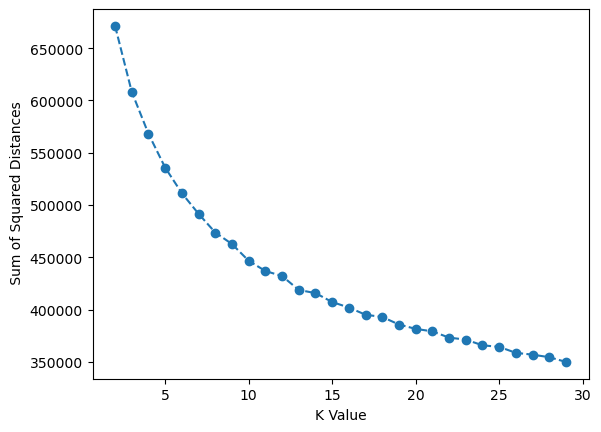

In [122]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")


#строим график где будут отображаться рузельтаты соединенными точками и линиями в зависимости от значений переменной k
#которая изменяется в пределах от 2 до 29.
#значения берутся из переменнрой ssd
#задаем название оси x (горизонтальной оси) графика как "K Value" (Значение K)
#задает название оси y (вертикальной оси) графика как "Sum of Squared Distances" (Сумма квадратов расстояний)
#график, отображающий сумму квадратов расстояний в зависимости от количества кластеров
#что помогает выбрать оптимальное количество кластеров для модели

In [164]:
model = KMeans(n_clusters=9)
model.fit(scaled_df)
#число 15 указывает сколько кластеров будет создано в этой модели

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [165]:
model.labels_
#код возвращает метки кластеров для каждого образца в данных после обучения модели KMeans
#Каждый образец будет иметь метку
#которая указываюетпринадлежность к определенному кластеру в результате кластеризации модели

array([3, 6, 3, ..., 4, 0, 8])

In [166]:
df['K15Clalls'] = model.labels_

#добавляем новый столбец и заполняем его значениями меток класстеров
#которые были предсказанны для каждых данных
#теперь в дата фрейме будет информация о пренадлежности к определеномву класстеру после обученяи модели


<Axes: >

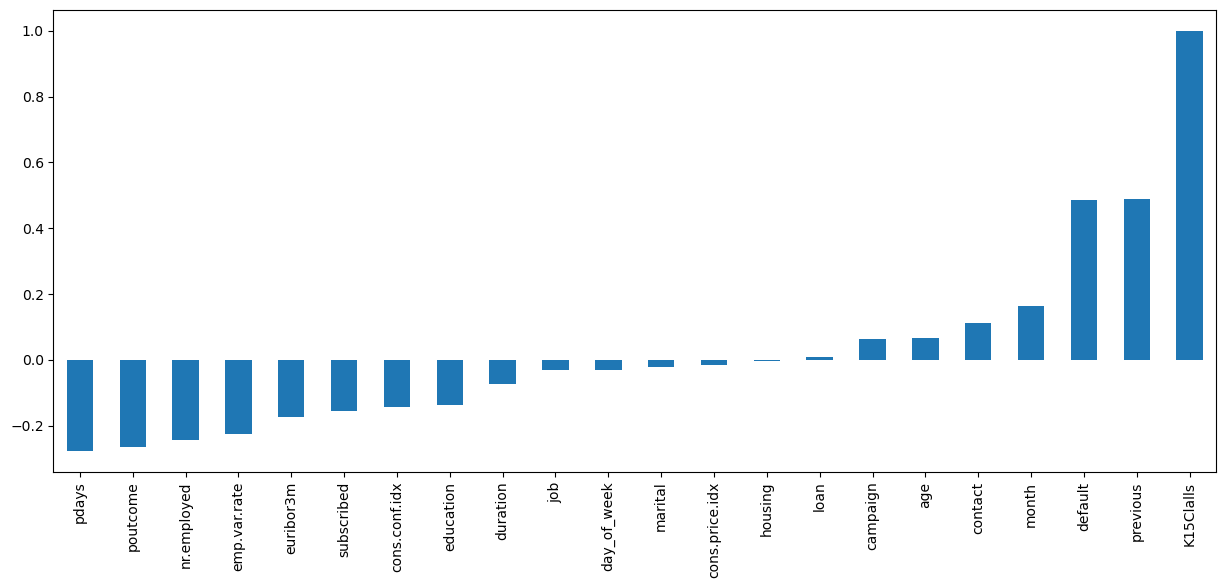

In [167]:
df.corr()['K15Clalls'].sort_values().plot(kind='bar',figsize=(15,6))

#вычесление карреляции междуду значениями нового столбца 'K=15 Clusters'и всеми другими столбцами в дата фрейме
#далее результаты сортируются и строится диаграмма кореляции
#выводится отрицательное, положительное или отсутствие 
#взаимосвязи между кластерной принадлежностью и другими признаками в данных


In [168]:
df.corr()['K15Clalls']
#на сколько два признака связаны друг с другом

age               0.065595
job              -0.030095
marital          -0.022871
education        -0.138930
default           0.484304
housing          -0.004779
loan              0.006947
contact           0.111921
month             0.163618
day_of_week      -0.029812
duration         -0.074415
campaign          0.063487
pdays            -0.277245
previous          0.489648
poutcome         -0.264408
emp.var.rate     -0.225652
cons.price.idx   -0.015900
cons.conf.idx    -0.142426
euribor3m        -0.173598
nr.employed      -0.243084
subscribed       -0.156764
K15Clalls         1.000000
Name: K15Clalls, dtype: float64

In [169]:
# Изменение метрики SSD - текущее минус предыдущее значение!
pd.Series(ssd).diff()

#диф вычисляе т разницу междуу текущими и предыдущимизначениями

0              NaN
1    -63102.124219
2    -40038.145771
3    -32368.179456
4    -24459.062805
5    -19713.081116
6    -17887.679755
7    -11008.304183
8    -16026.186602
9     -9765.878149
10    -4798.155246
11   -13332.149418
12    -3009.904653
13    -8530.548030
14    -5266.714172
15    -6899.402961
16    -2111.889156
17    -7238.496974
18    -4152.784668
19    -2381.355473
20    -5997.329372
21    -1879.328120
22    -5457.379044
23    -1486.447867
24    -5730.488961
25    -1720.250856
26    -2447.823669
27    -4502.761617
dtype: float64

классифиукация

In [170]:
#Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [171]:
#в переменную y сохраняется столбец 'K15Clusters' из исходного набора данных X
y = df['K15Clalls']

In [172]:
df = pd.get_dummies(df.drop('K15Clalls',axis=1),drop_first=True)
#из исходного набора данных X удаляется столбец K15Clusters с помощью drop и результат сохраняется в переменную X 
#При этом используется параметр axis 1что столбец долже н быть удален, а не строка.

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=101)
#обучение
#данные разделяются на тренировочные и тестовые наборы

In [176]:
#дерево решений

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
model = DecisionTreeClassifier()

In [179]:
model.fit(df_train,y_train)
#обучаем модель

DecisionTreeClassifier()

In [180]:
#вывод предсказания

In [181]:
base_pred = model.predict(df_test)
base_pred
#в а\переменную сохраняются данные предсказания
#вывод предсказания

array([3, 3, 3, ..., 6, 3, 3])

In [182]:
#работа модели

In [183]:
# отчет о классификации
print(classification_report(y_test,base_pred))
#точность истенно положительные
#полнота для истенно положительных

#Precision (точность) - это доля правильно классифицированных положительных прогнозов
#Recall (полнота) - это доля правильно классифицированных положительных прогнозов
#F1-score - это гармоническое среднее между Precision и Recall и используется для оценки качества модели
#Support - количество экземпляров в каждом классе
#Каждая строка комментирует метрики для соответствующего класса
#Например, для класса 0 точность составляет 0.75, полнота - 1.00, а f1-мера - 0.86
#accuracy: Точность - доля правильных предсказаний среди всех предсказаний

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       495
           1       1.00      1.00      1.00      2690
           2       0.96      0.96      0.96       573
           3       1.00      1.00      1.00      2569
           4       1.00      0.99      1.00      1586
           5       0.93      0.96      0.95       278
           6       1.00      0.99      1.00      1892
           7       0.99      0.97      0.98       374
           8       0.98      0.99      0.99      1011

    accuracy                           0.99     11468
   macro avg       0.98      0.98      0.98     11468
weighted avg       0.99      0.99      0.99     11468



Метод K-ближайших соседей